2024-07-08 20:22:18.298123: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.3317 - mean_absolute_error: 0.4871 - val_loss: 0.3788 - val_mean_absolute_error: 0.5437
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3036 - mean_absolute_error: 0.4671 - val_loss: 0.3502 - val_mean_absolute_error: 0.5149
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2826 - mean_absolute_error: 0.4438 - val_loss: 0.3184 - val_mean_absolute_error: 0.4836
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2492 - mean_absolute_error: 0.4079 - val_loss: 0.2837 - val_mean_absolute_error: 0.4522
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1887 - mean_absolute_error: 0.3450 - val_loss: 0.2474 - val_mean_absolute_error: 0.4236
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1855 - mean_absolute_error: 0.3454 - val_loss: 0.2095 - val_mean_absolute_error: 0.3911
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1458 - mean_absolute_error: 0.3126 - val_loss: 0.17

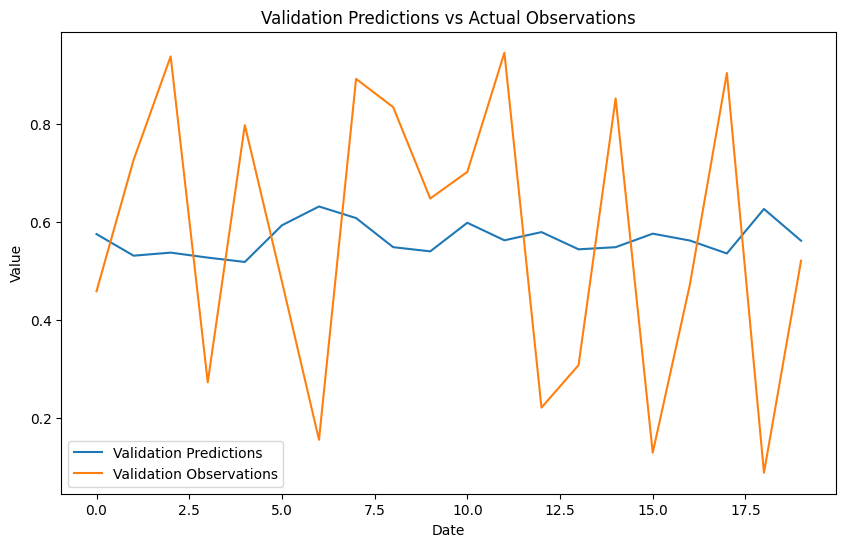

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Generate some example data
# Replace this with your actual data
X_train = np.random.random((100, 3, 1))  # 100 samples, 3 timesteps, 1 feature
y_train = np.random.random(100)          # 100 target values
X_val = np.random.random((20, 3, 1))     # 20 samples, 3 timesteps, 1 feature
y_val = np.random.random(20)             # 20 target values
dates_val = np.arange(20)                # Example dates, replace with actual dates

# Define the model
model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']
)

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

# Make predictions on the validation set
val_predictions = model.predict(X_val).flatten()

# Plot the validation predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(dates_val, val_predictions, label='Validation Predictions')
plt.plot(dates_val, y_val, label='Validation Observations')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Validation Predictions vs Actual Observations')
plt.legend()
plt.show()